### Importing and building the plotting functions

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import datetime as dt
import numpy as np

In [2]:
%matplotlib inline
pd.set_option('display.max_rows', 200)
pd.set_option('display.max_columns', 20)
plt.style.use('fivethirtyeight')
# plt.style.use('seaborn')

In [3]:
def plotter(DF, name, xlabel= 'Date', scale = 'log', col = 'imp'):
    plt.figure(figsize = (14, 7))
    plt.yscale(scale)
    
    columns = DF.columns if col == 'all' else Countries[::-1]
    for col in columns:
        plt.plot(DF.index,
                 DF[col],
                 label = col if col in Countries else None,
                 linestyle = ':' if 'World' in col else '-',
                 color = colors[col] if col in colors else 'pink', 
                 alpha = 0.8# if col in Countries else 0.4
                )
    plt.title(name+' wrt Date in Countries')
    plt.xlabel(xlabel)
    plt.ylabel(name)
    plt.legend(loc = 2)
    plt.show()

In [4]:
def plotwrtDeaths(DF2, name1, DF, name2 = 'Deaths', scale = 'log', col = 'imp'):
    plt.figure(figsize = (14, 7))
    plt.xscale(scale)
    plt.yscale(scale)
    
#     plt.ylim(bottom=0.05, top=2*10**4)
    
    columns = DF.columns if col == 'all' else Countries[::-1]
    for col in columns:
        plt.plot(DF[col],
                 DF2[col],
                 label = col if col in Countries else None,
                 linestyle = ':' if 'World' in col else '-',
                 color = colors[col] if col in colors else 'pink', 
                 alpha = 0.8 if col in Countries else 0.4
                )
    plt.title(f'{name1} wrt {name2} in Countries')
    plt.xlabel(name2)
    plt.ylabel(name1)
    plt.legend(loc = 2)
    plt.show()

In [5]:
def stackplotter(DF, name, tail=None):
    plt.figure(figsize = (14, 7))
    
    if tail:
        DF = DF.tail(tail)
    columns = Countries[::-1]
    columns = [t for t in columns if 'World' not in t][::-1]
    
    plt.stackplot(DF.index, 
                  DF[['World']].T, 
                  labels=['World'], 
                  colors=['blue'], 
                  alpha=0.2,                 
                 )
    
    plt.stackplot(DF.index, 
                  DF[columns].T, 
                  labels=columns, 
                  colors=[colors[c] for c in columns], 
                  alpha=0.8,                 
                 )
    
    
    plt.title(name+' wrt Date in Countries')
    plt.xlabel('Date')
    plt.ylabel(name)
    plt.legend(loc = 2)
    plt.show()

### Importing the Data from Johns Hopkins data

In [6]:
data_url = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv'
DF = pd.read_csv(data_url)

In [7]:
DF = DF.groupby('Country/Region').sum()
DF = DF.drop(columns = ['Lat', 'Long']).transpose()
DF['World'] = DF.sum(axis = 1)
DF = DF.rename(columns = {'United Kingdom': 'UK', 'Korea, South': 'S.Korea', 'Country/Region': 'Date'})
DF.index = pd.to_datetime(DF.index, format = '%m/%d/%y')
# DF.index.rename('Date', inplace = True)

Deaths = DF.copy()

In [8]:
data_url = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv'
DF = pd.read_csv(data_url)

In [9]:
DF = DF.groupby('Country/Region').sum()
DF = DF.drop(columns = ['Lat', 'Long']).transpose()
DF['World'] = DF.sum(axis = 1)
DF = DF.rename(columns = {'United Kingdom': 'UK', 'Korea, South': 'S.Korea', 'Country/Region': 'Date'})
DF.index = pd.to_datetime(DF.index, format = '%m/%d/%y')
# DF.index.rename('Date', inplace = True)

Confirmed = DF.copy()

In [10]:
colors = {'India': 'Blue', 
          'World': 'Blue', 
          'US': 'Black', 
          'Brazil': 'darkgreen', 
          'Mexico': 'Orange', 
          'UK': 'Purple', 
          'Italy': 'grey', 
          'Russia': 'cyan', 
          'France': 'violet', 
          'Germany': 'lime', 
          'Spain': 'teal',
          'Colombia': 'lightgreen', 
#           'Argentina': 'Teal',
          'Iran': 'brown', 
          'China': 'red', 
          'Peru': 'yellow'
         }

Countries = list(colors.keys())

### Deaths

In [11]:
Deaths[Countries].tail(5)

Country/Region,India,World,US,Brazil,Mexico,UK,Italy,Russia,France,Germany,Spain,Colombia,Iran,China,Peru
2021-08-06,427371,4278354,616493,561762,243733,130482,128187,160574,112347,91785,82006,122087,93086,4848,196818
2021-08-07,427862,4286932,616718,562752,244248,130585,128209,161343,112379,91789,82006,122277,93473,4848,196873
2021-08-08,428309,4294361,616829,563151,244420,130630,128220,162109,112407,91791,82006,122458,94015,4848,196950
2021-08-09,428682,4302961,617321,563562,244690,130667,128242,162860,112430,91810,82125,122601,94603,4848,197029
2021-08-10,429179,4314527,618137,564773,245476,130813,128273,163629,112575,91824,82227,122768,95111,4848,197102


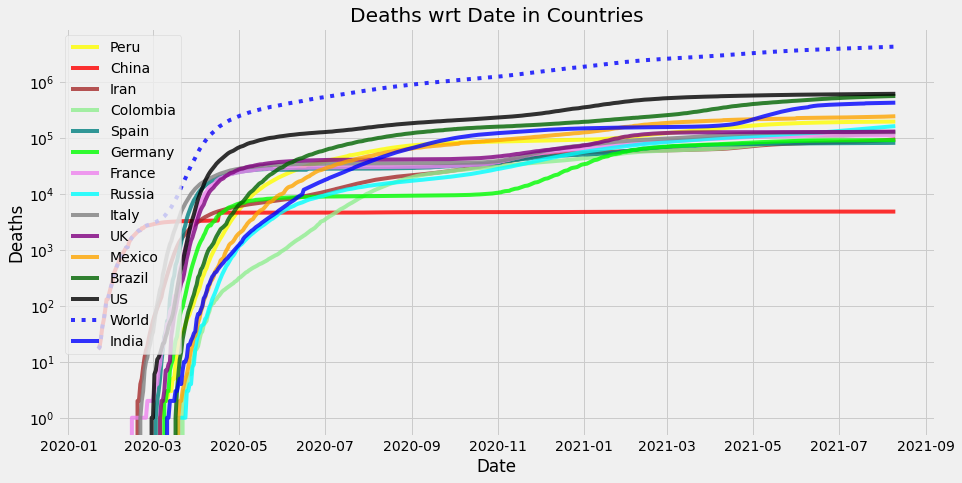

In [12]:
plotter(Deaths, 'Deaths')

### Confirmed Cases

In [13]:
Daily_Confirmed = np.round((Confirmed - Confirmed.shift(1))/1)
Daily_Confirmed = Daily_Confirmed.fillna(0).astype('int')
Daily_Confirmed[Countries].tail(5)

Country/Region,India,World,US,Brazil,Mexico,UK,Italy,Russia,France,Germany,Spain,Colombia,Iran,China,Peru
2021-08-06,38628,821309,254981,42159,21563,31633,6599,22073,26006,3388,21561,6980,34913,109,1496
2021-08-07,39070,544732,44082,43033,20018,28344,6897,21727,25755,2761,0,6051,26439,103,1571
2021-08-08,35499,437309,24234,13893,7573,27244,5733,22271,20450,2240,0,4350,39619,127,1217
2021-08-09,28204,656601,184346,12085,6513,25056,4200,21554,3919,2220,39638,4023,40808,145,503
2021-08-10,38353,637451,106871,34885,19555,23469,5624,20765,32020,3282,15680,3948,39139,115,1186


In [14]:
Confirmed_EWM = np.round(Daily_Confirmed.ewm(com=14).mean().astype(int))
Confirmed_EWM[Countries].tail()

Country/Region,India,World,US,Brazil,Mexico,UK,Italy,Russia,France,Germany,Spain,Colombia,Iran,China,Peru
2021-08-06,43515,571646,77215,40785,13530,29756,4407,22448,17369,2038,21292,12788,27529,66,1829
2021-08-07,43219,569851,75006,40935,13962,29661,4573,22400,17928,2086,19873,12339,27456,68,1812
2021-08-08,42704,561015,71621,39132,13536,29500,4650,22391,18097,2097,18548,11806,28267,72,1772
2021-08-09,41737,567387,79136,37329,13068,29204,4620,22336,17151,2105,19954,11287,29103,77,1687
2021-08-10,41512,572058,80985,37166,13501,28822,4687,22231,18143,2183,19669,10798,29772,80,1654


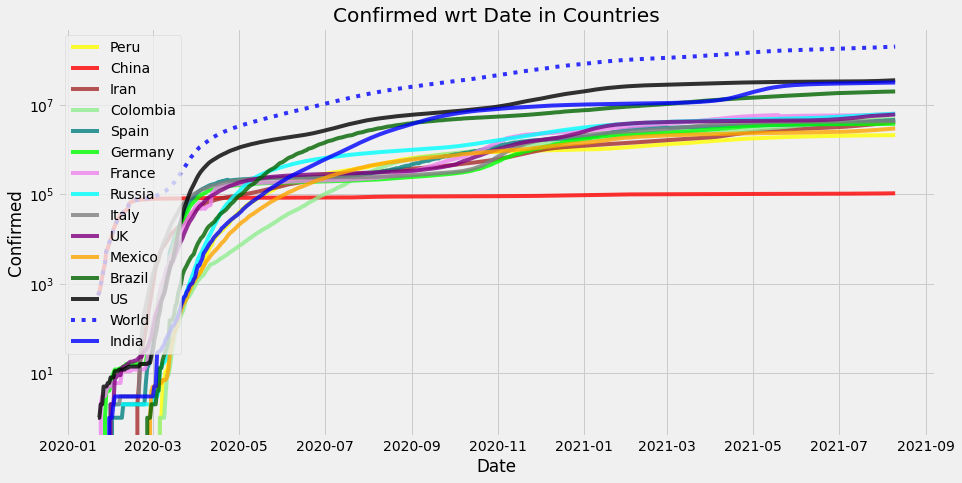

In [15]:
plotter(Confirmed, 'Confirmed')

### Daily Deaths

In [16]:
Daily_Deaths = np.round((Deaths - Deaths.shift(1))/1)
Daily_Deaths = Daily_Deaths.fillna(0).astype('int')
Daily_Deaths[Countries].tail(5)

Country/Region,India,World,US,Brazil,Mexico,UK,Italy,Russia,France,Germany,Spain,Colombia,Iran,China,Peru
2021-08-06,617,10564,1147,1056,568,92,24,771,64,24,75,188,458,0,58
2021-08-07,491,8578,225,990,515,103,22,769,32,4,0,190,387,0,55
2021-08-08,447,7429,111,399,172,45,11,766,28,2,0,181,542,0,77
2021-08-09,373,8600,492,411,270,37,22,751,23,19,119,143,588,0,79
2021-08-10,497,11566,816,1211,786,146,31,769,145,14,102,167,508,0,73


### Exponential Weighted Mean

In [17]:
EWM = np.round(Daily_Deaths.ewm(com=7).mean(), 2)
name = 'Exponential Weighted Mean Weekly'

Weekly_Avg = np.round((Deaths - Deaths.shift(7))/7, 2)
# name = 'Weekly Average Deaths'

AVG = EWM 
# AVG = Weekly_Avg
AVG[Countries].tail(5)

Country/Region,India,World,US,Brazil,Mexico,UK,Italy,Russia,France,Germany,Spain,Colombia,Iran,China,Peru
2021-08-06,593.76,9602.80,486.90,1023.45,435.09,82.16,19.22,766.99,42.76,20.60,60.99,287.15,345.93,-0.01,85.95
2021-08-07,580.92,9474.70,454.16,1019.27,445.08,84.76,19.57,767.24,41.42,18.52,53.36,275.01,351.06,-0.01,82.08
2021-08-08,564.18,9218.99,411.27,941.73,410.95,79.79,18.50,767.08,39.74,16.46,46.69,263.26,374.93,-0.00,81.44
2021-08-09,540.28,9141.62,421.36,875.39,393.33,74.44,18.94,765.07,37.65,16.78,55.73,248.22,401.56,-0.00,81.14
2021-08-10,534.87,9444.66,470.69,917.34,442.41,83.39,20.44,765.56,51.07,16.43,61.51,238.07,414.87,-0.00,80.12


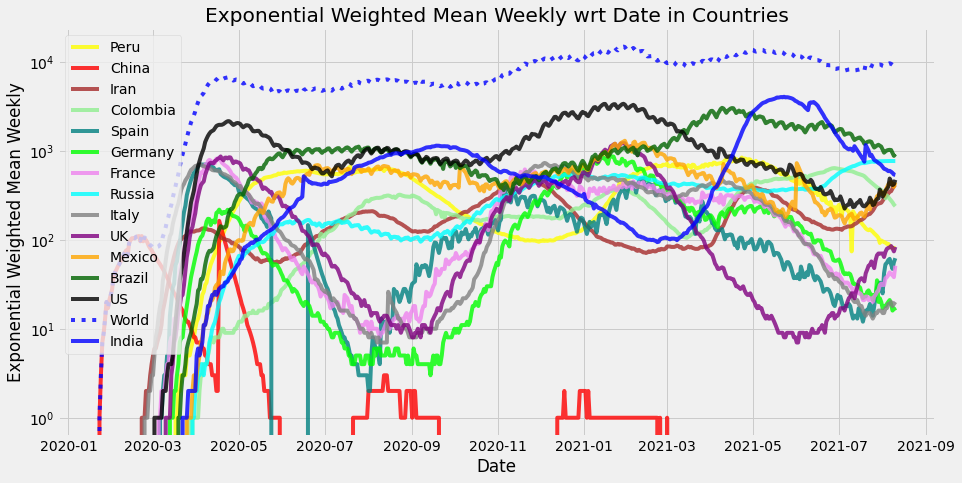

In [18]:
plotter(np.round(AVG), name)

### Stack Plots

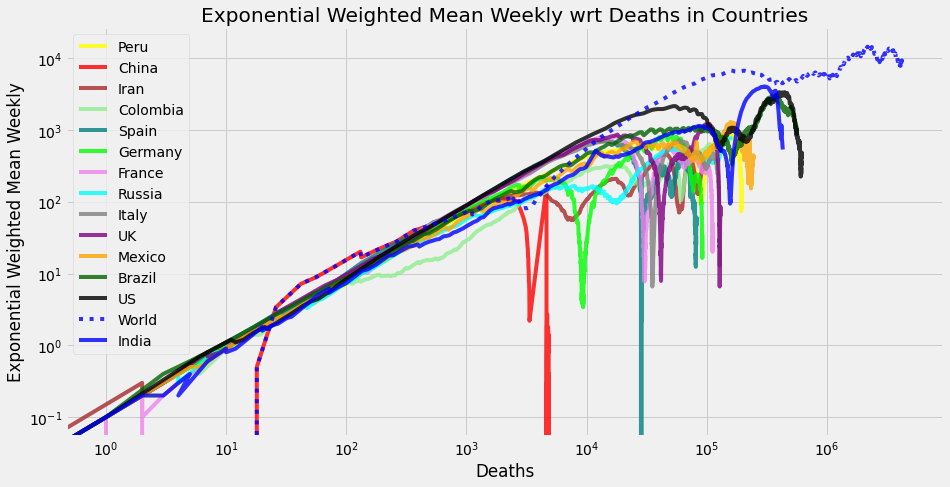

In [19]:
plotwrtDeaths(np.round(AVG, 1), name, Deaths)

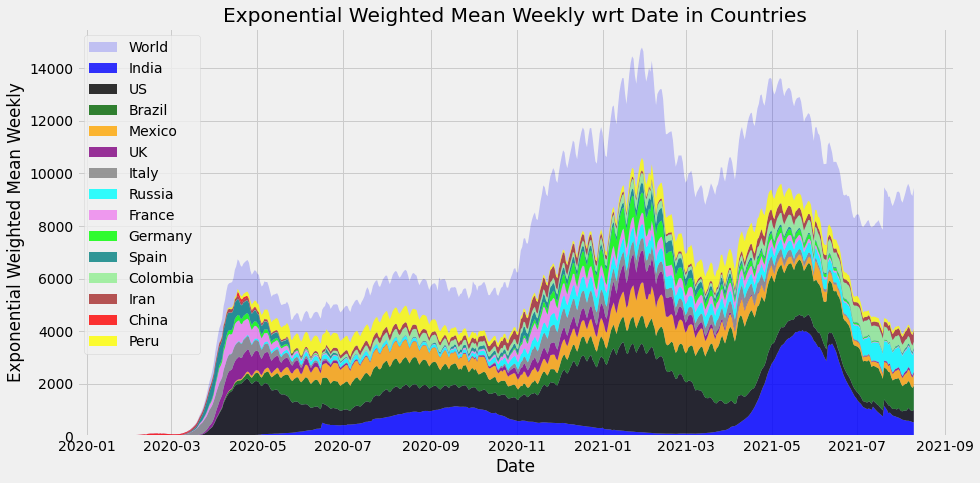

In [20]:
stackplotter(AVG, name)

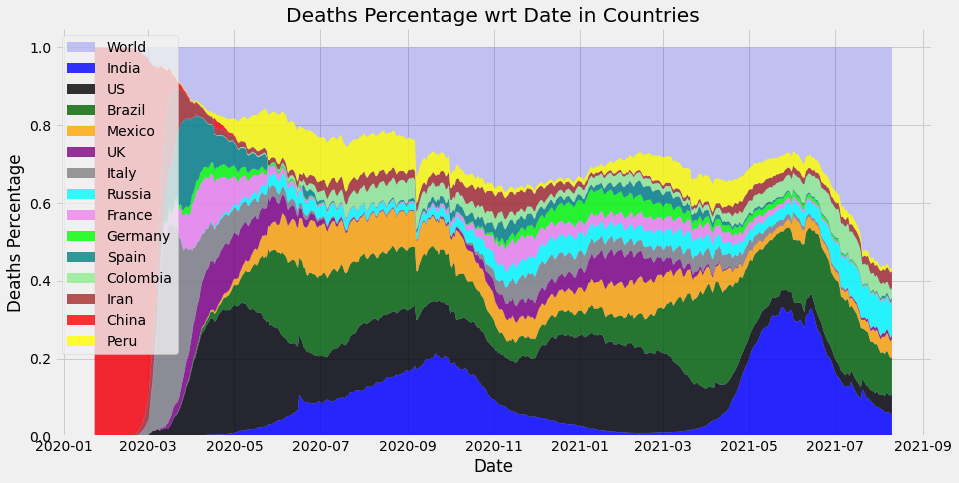

In [21]:
stackplotter(AVG.divide(AVG.World, axis=0), 'Deaths Percentage')

### Reproductivity

In [22]:
Reproductivity = np.round(EWM/EWM.shift(14), 4).clip(lower= 0.1)
Reproductivity[EWM.shift(14) < 12] = 1

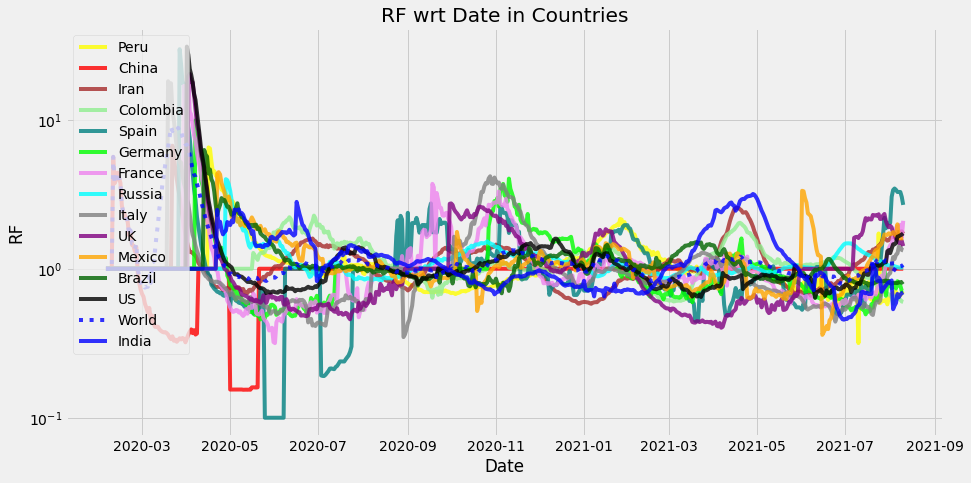

In [23]:
plotter(Reproductivity, 'RF')

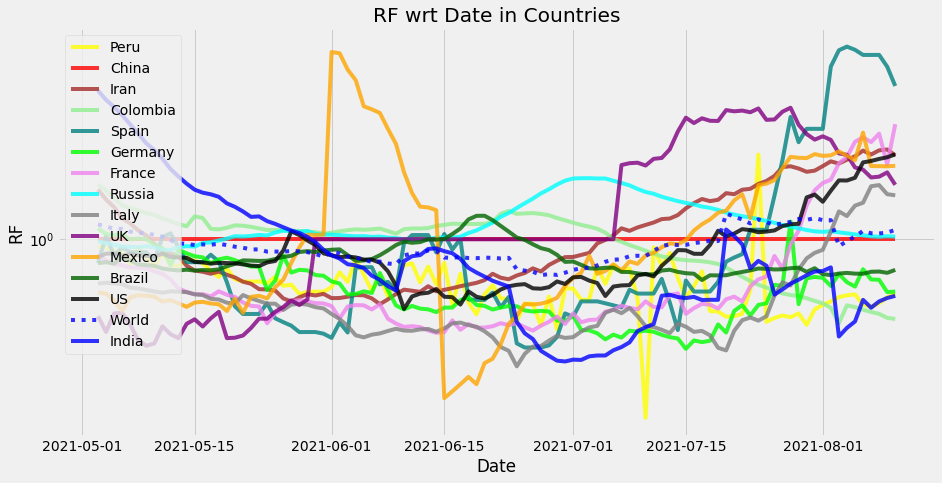

In [24]:
plotter(Reproductivity.tail(100), 'RF')

### Test rate

In [25]:
# We take the mortality to be 0.5%

mortality = 0.005

Testrate = np.round(Confirmed_EWM/(EWM/mortality), 3)
Testrate[EWM < 12] = None

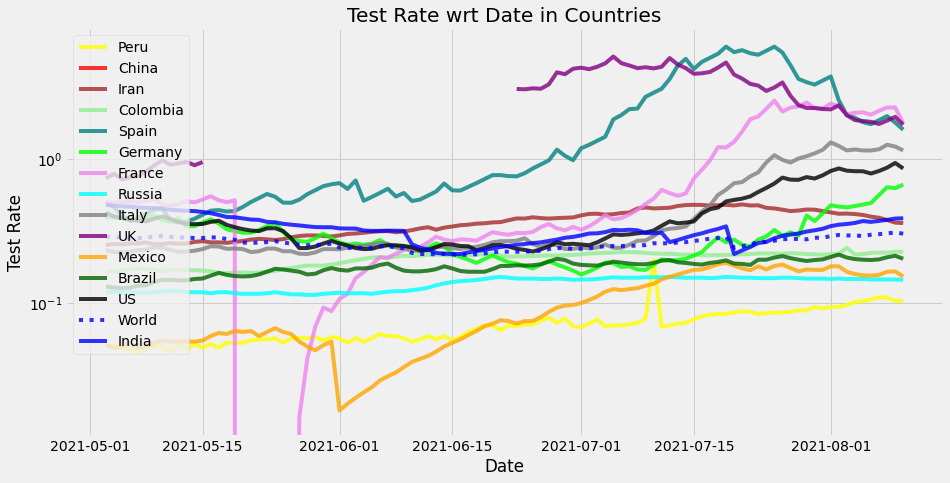

In [26]:
plotter(Testrate.tail(100), 'Test Rate', scale= 'log')

### Time Adjusted for starting day

In [27]:
def adjust_days(DF):
    X = DF.copy()
#     X.reset_index()
    for col in DF.columns:
        L = list(DF[Deaths[col]>5][col])
        X[col] = L + [None for _ in range(len(X[col]) - len(L))]
    return X.reset_index()[DF.columns]
xlabel= 'Days from 5 Deaths'

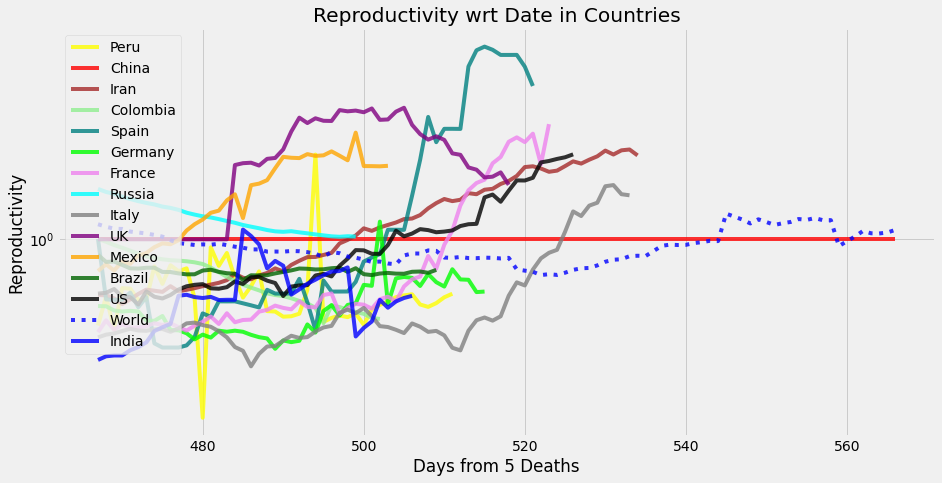

In [28]:
RF_A = adjust_days(Reproductivity)
plotter(RF_A.tail(100), 'Reproductivity', xlabel)

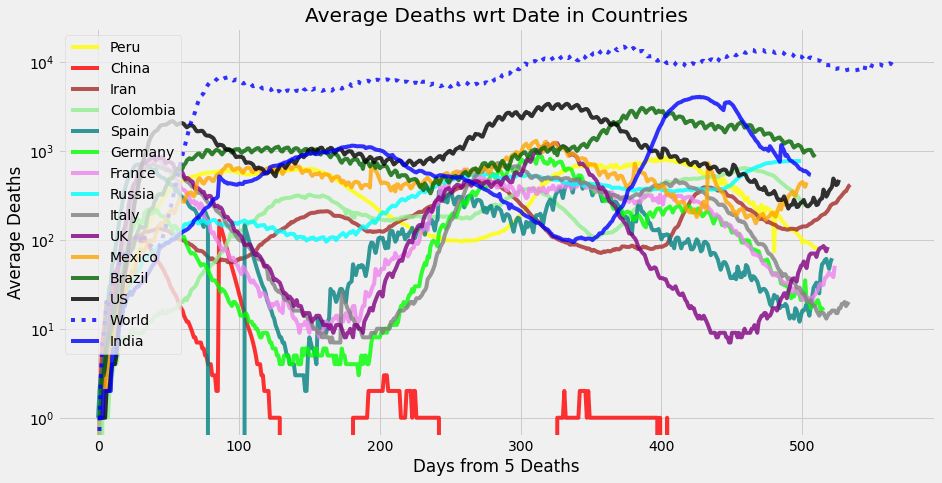

In [29]:
AVG_A = adjust_days(AVG)
plotter(np.round(AVG_A), 'Average Deaths', xlabel)

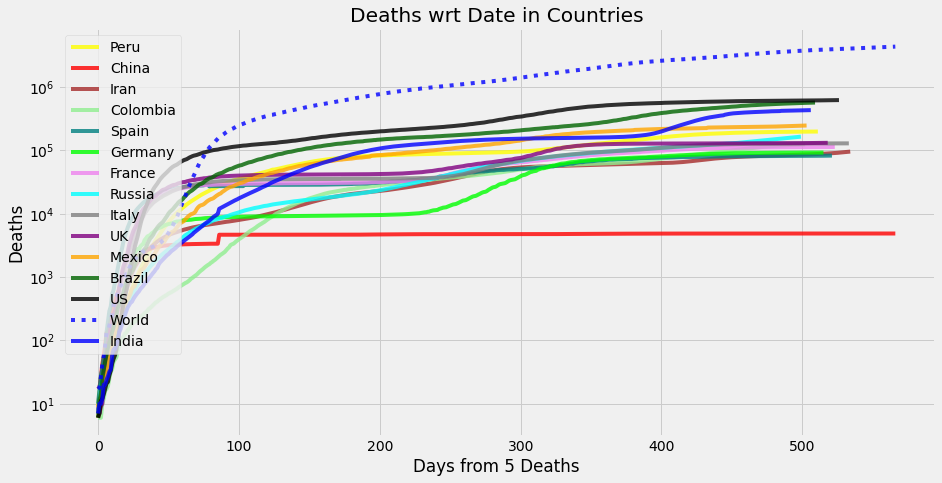

In [30]:
Deaths_A = adjust_days(Deaths)
plotter(Deaths_A, 'Deaths', xlabel)

### Today's Statistics by combining the previous tables

In [31]:
LastDay_DF = pd.DataFrame()
LastDay_DF['Country'] = Deaths.columns
LastDay_DF = LastDay_DF.set_index('Country')

D = {
    'Deaths':Deaths,
    'Daily_Deaths':Daily_Deaths,
    'Weekly_Deaths': Weekly_Avg,
    'EWM7': EWM,
    'Reproductivity':Reproductivity,
    'Confirmed': Confirmed, 
    'Testrate': Testrate,
    'Confirmed_EWM': Confirmed_EWM
    }
for name in D:
    LastDay_DF[name] = D[name].iloc[-1]
LastDay_DF['Estimated(M)'] = np.round((LastDay_DF.Deaths/mortality)/1000000, 2)

In [32]:
LastDay_DF.sort_values('Deaths', ascending = False).head(12)

,Deaths,Daily_Deaths,Weekly_Deaths,EWM7,Reproductivity,Confirmed,Testrate,Confirmed_EWM,Estimated(M)
Country,,,,,,,,,
World,4314527,11566,9757.00,9444.66,1.0621,204022307,0.303,572058,862.91
US,618137,816,545.14,470.69,1.7274,36055002,0.860,80985,123.63
Brazil,564773,1211,905.86,917.34,0.8212,20212642,0.203,37166,112.95
India,429179,497,488.86,534.87,0.6949,32036511,0.388,41512,85.84
Mexico,245476,786,505.71,442.41,1.6047,2997885,0.153,13501,49.10
Peru,197102,73,72.00,80.12,0.7044,2127034,0.103,1654,39.42
Russia,163629,769,766.57,765.56,1.0178,6404960,0.145,22231,32.73
UK,130813,146,90.57,83.39,1.4199,6146642,1.728,28822,26.16
Italy,128273,31,22.57,20.44,1.3273,4406241,1.147,4687,25.65


In [33]:
LastDay_DF.sort_values('Weekly_Deaths', ascending = False).head(12)

,Deaths,Daily_Deaths,Weekly_Deaths,EWM7,Reproductivity,Confirmed,Testrate,Confirmed_EWM,Estimated(M)
Country,,,,,,,,,
World,4314527,11566,9757.00,9444.66,1.0621,204022307,0.303,572058,862.91
Indonesia,110619,2048,1675.71,1633.31,1.2206,3718821,0.105,34455,22.12
Brazil,564773,1211,905.86,917.34,0.8212,20212642,0.203,37166,112.95
Russia,163629,769,766.57,765.56,1.0178,6404960,0.145,22231,32.73
US,618137,816,545.14,470.69,1.7274,36055002,0.860,80985,123.63
Mexico,245476,786,505.71,442.41,1.6047,2997885,0.153,13501,49.10
India,429179,497,488.86,534.87,0.6949,32036511,0.388,41512,85.84
Iran,95111,508,475.14,414.87,1.7159,4238676,0.359,29772,19.02
South Africa,75201,189,315.57,317.56,0.8943,2546762,0.182,11568,15.04


### Pie Chart

In [34]:
def piechart(name='Deaths', size=12, DF=LastDay_DF):
    plt.figure(figsize = (size, size))
    DF = DF.sort_values(name, ascending = False)
    
    countries = DF.index[1:]
    deaths = DF[name][1:].clip(0, None)
    
    print ('World total: ',int( DF.loc['World'][name]))
    
    plt.pie(deaths, 
            labels= [c +' '+ str(d) for c, d in zip(countries, deaths)], 
            startangle=90,
            counterclock=False,
            autopct='%1.f%%', 
#             pctdistance=0.8
           )
    
    plt.title(name+' piechart for every country')

World total:  4314527


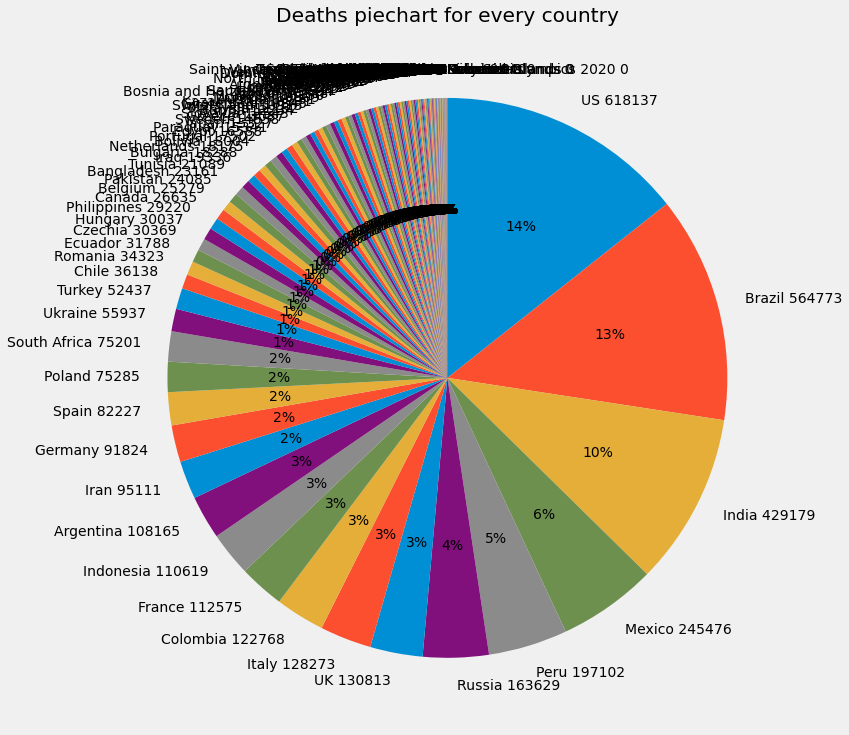

In [35]:
piechart('Deaths')

World total:  9757


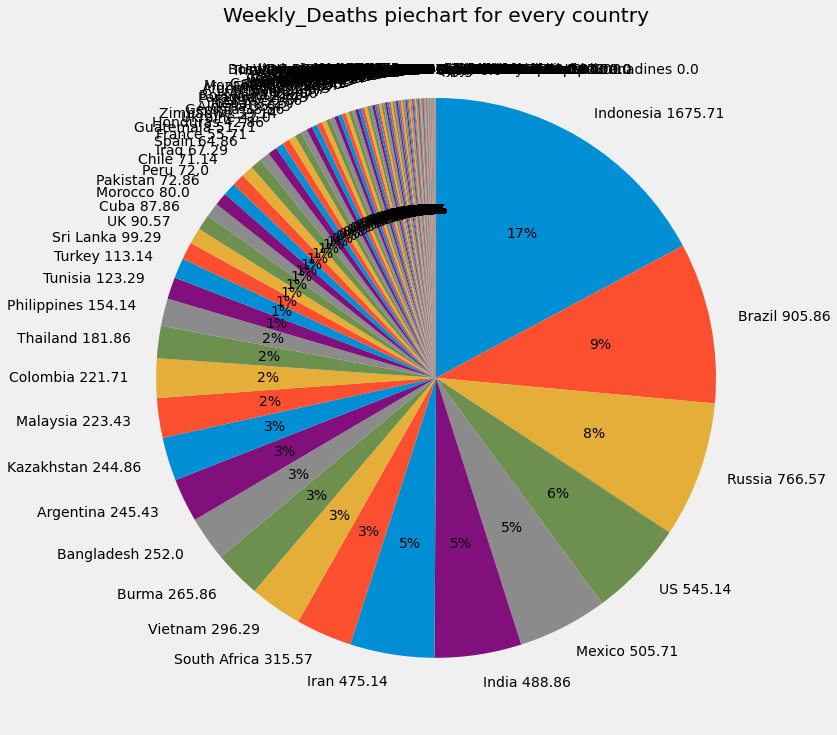

In [36]:
piechart('Weekly_Deaths')

World total:  11566


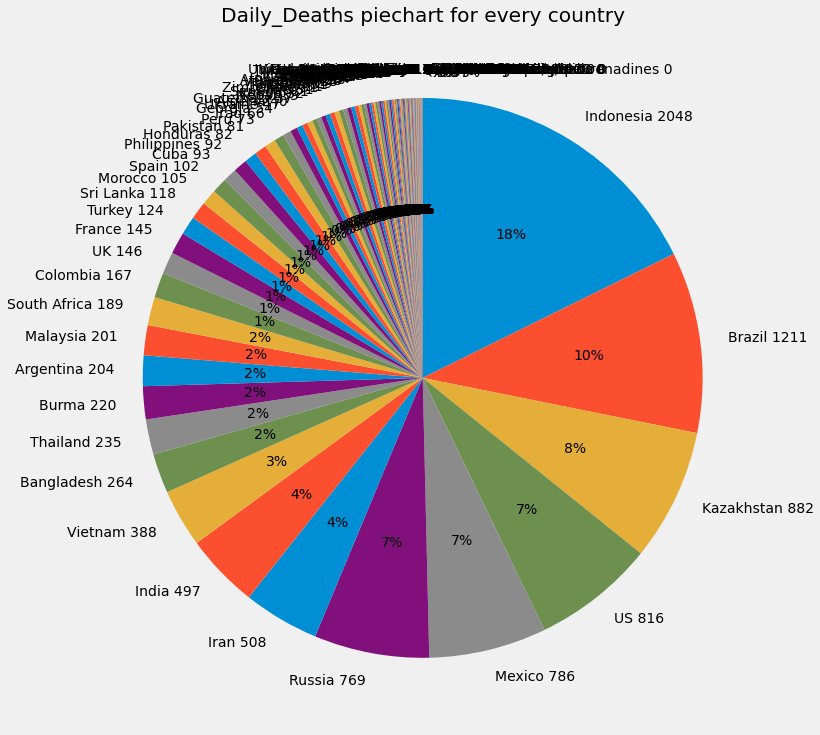

In [37]:
piechart('Daily_Deaths')

In [38]:
print('Today\'s Date: ', dt.datetime.now().date())

Today's Date:  2021-08-11


In [39]:
# Total estimated Cases: 
LastDay_DF.loc['World'].Deaths/mortality

862905400.0

<p>Per Capita deaths are included in this  <a href="https://www.statista.com/statistics/1104709/coronavirus-deaths-worldwide-per-million-inhabitants/" rel="nofollow">Statista</a></p>

In [40]:
!git add .
!git commit -m "`date` update"
!git push origin master

The file will have its original line endings in your working directory


[master cf9e212] `date` update
 1 file changed, 657 insertions(+), 2115 deletions(-)
 rewrite Simplified Death Statistics SARS-COV2.ipynb (99%)


To https://github.com/Arrowheadahp/COVID-19.git
   63d3d10..cf9e212  master -> master
